In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


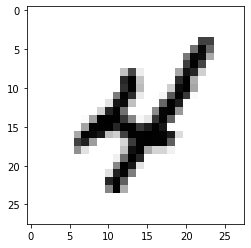

In [17]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

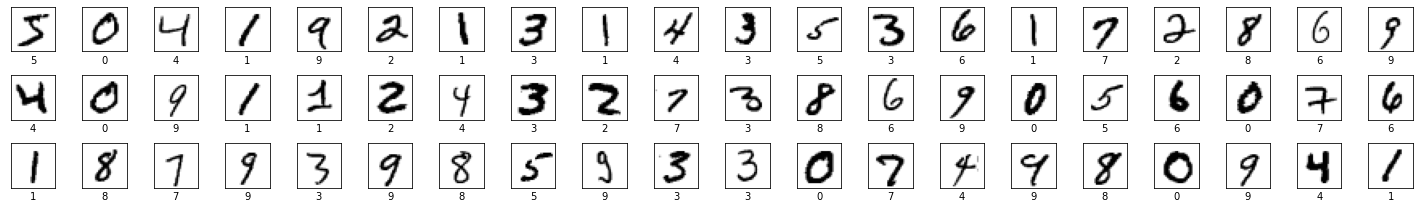

In [18]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [19]:
# normalize data
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

# without normalization data
x2_train = x_train.reshape(-1, 28,28,1)
x2_test = x_test.reshape(-1, 28,28,1)

# print shape
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of x_train: {x2_train.shape}")
print(f"Shape of x_test: {x2_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)
Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


Image (#9): Which is digit '4'


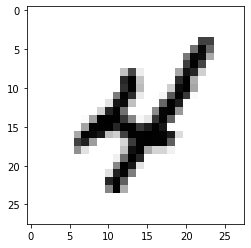

In [20]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [21]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 516,138
Trainable params: 516,138
Non-trainable params: 0
________________________________________________

##**Adam Optimizer**

In [22]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
# normalize data
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 57s 150ms/step - loss: 0.2067 - accuracy: 0.9390 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 2/5
375/375 [==============================] - 56s 149ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 3/5
375/375 [==============================] - 56s 151ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 4/5
375/375 [==============================] - 55s 148ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0402 - val_accuracy: 0.9880
Epoch 5/5
375/375 [==============================] - 55s 147ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0566 - val_accuracy: 0.9841


In [24]:
# without normalize data
h2 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 56s 149ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.0425 - val_accuracy: 0.9894
Epoch 2/5
375/375 [==============================] - 56s 148ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 3/5
375/375 [==============================] - 56s 148ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0501 - val_accuracy: 0.9876
Epoch 4/5
375/375 [==============================] - 56s 149ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0460 - val_accuracy: 0.9897
Epoch 5/5
375/375 [==============================] - 56s 148ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0464 - val_accuracy: 0.9877


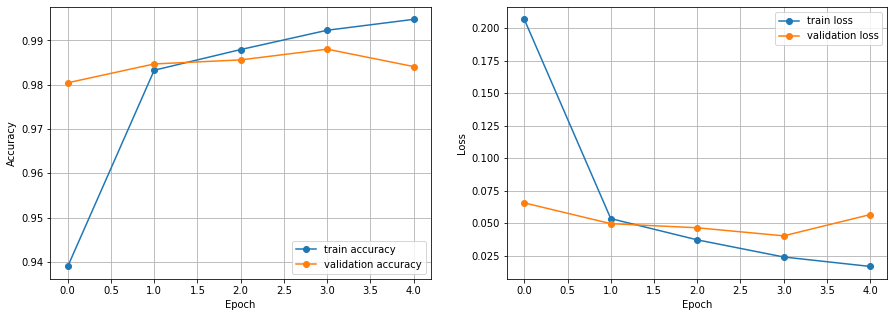

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

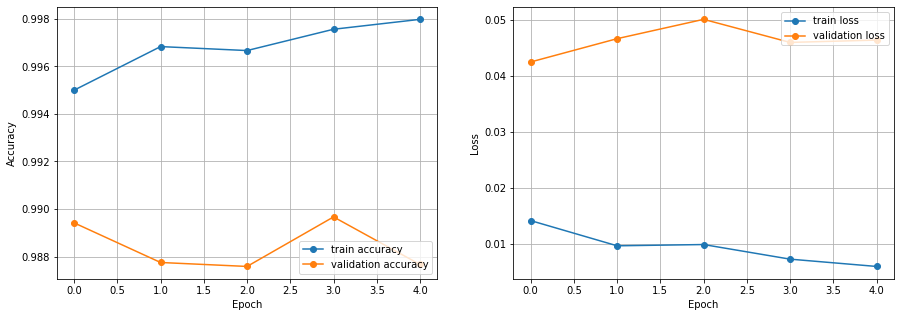

In [26]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0423 - accuracy: 0.9900

Test accuracy: 0.9900000095367432


In [28]:
# without normalization
test_loss2, test_acc2 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 3s 10ms/step - loss: 0.0423 - accuracy: 0.9900

Test accuracy: 0.9900000095367432


In [29]:
predictions = model.predict(x_test)

In [30]:
# without normalization
predictions2 = model.predict(x2_test)

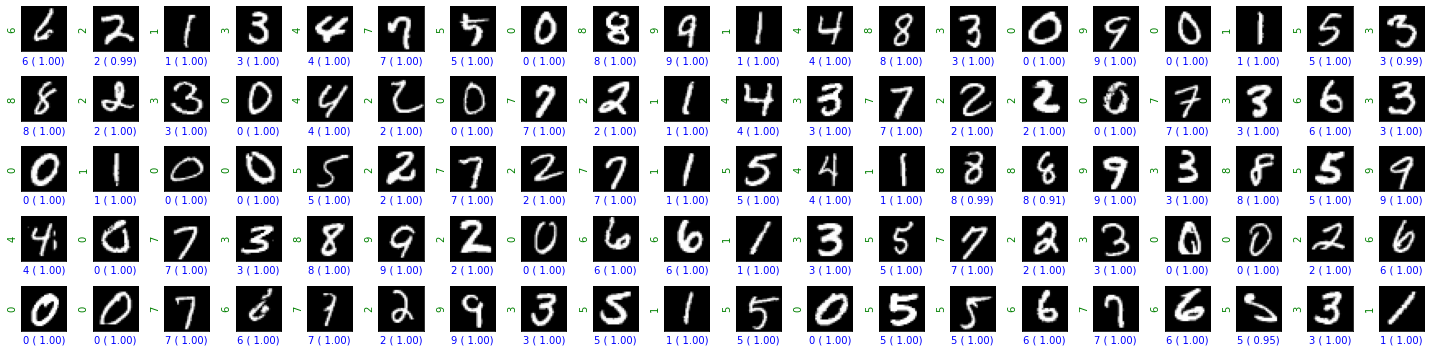

In [31]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

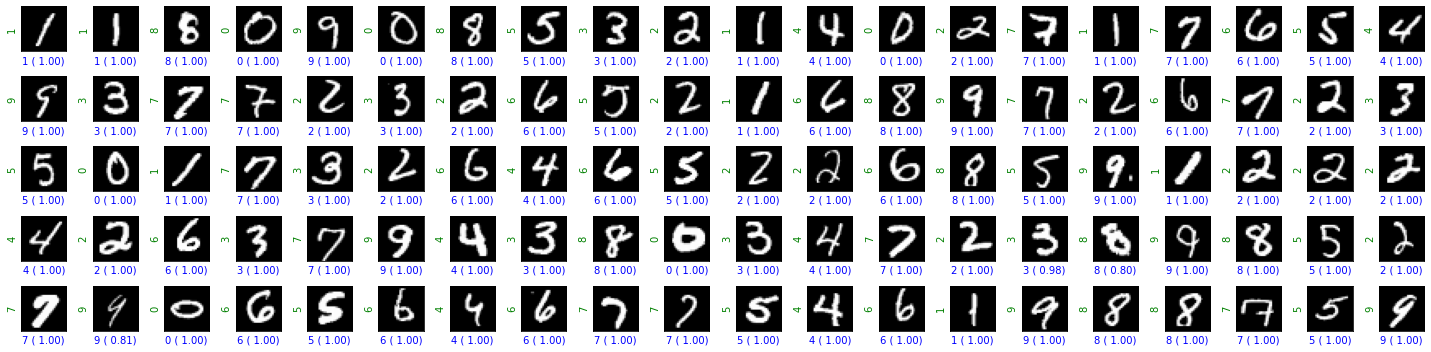

In [35]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions2 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions2[i]) 
        confidence = predictions2[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

##**SGD Optimizer**

In [36]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [37]:
# normalize data
h3 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 56s 147ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0415 - val_accuracy: 0.9901
Epoch 2/5
375/375 [==============================] - 55s 146ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0408 - val_accuracy: 0.9905
Epoch 3/5
375/375 [==============================] - 56s 149ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0410 - val_accuracy: 0.9906
Epoch 4/5
375/375 [==============================] - 55s 147ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0407 - val_accuracy: 0.9907
Epoch 5/5
375/375 [==============================] - 55s 148ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0409 - val_accuracy: 0.9905


In [38]:
# without normalize data
h4 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 55s 147ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0408 - val_accuracy: 0.9906
Epoch 2/5
375/375 [==============================] - 55s 147ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0412 - val_accuracy: 0.9907
Epoch 3/5
375/375 [==============================] - 55s 146ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0410 - val_accuracy: 0.9908
Epoch 4/5
375/375 [==============================] - 55s 146ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0412 - val_accuracy: 0.9909
Epoch 5/5
375/375 [==============================] - 55s 146ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0413 - val_accuracy: 0.9909


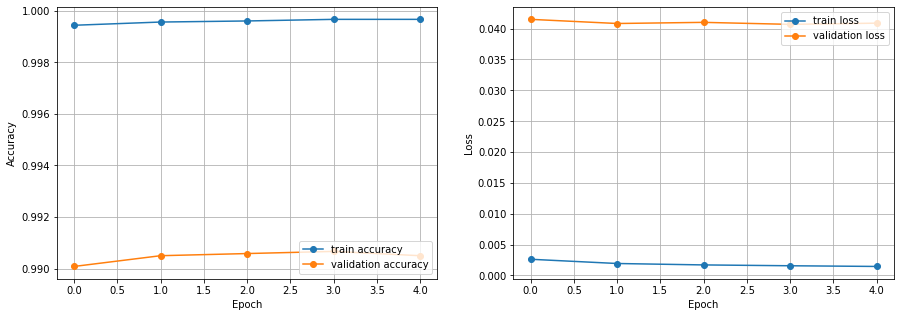

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

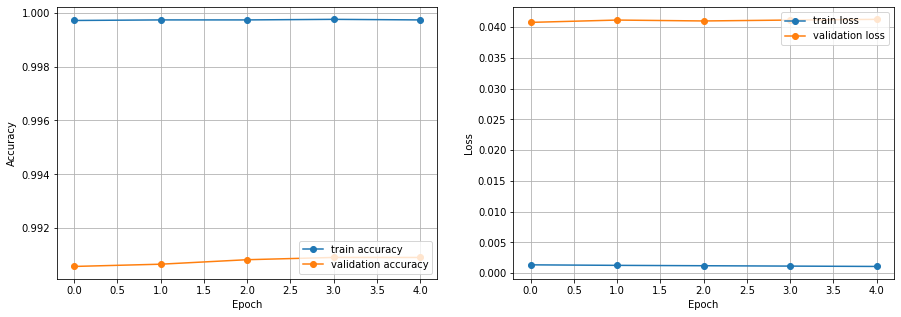

In [40]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [41]:
test_loss3, test_acc3 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0364 - accuracy: 0.9909

Test accuracy: 0.9900000095367432


In [42]:
# without normalization
test_loss4, test_acc4 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 3s 10ms/step - loss: 0.0364 - accuracy: 0.9909

Test accuracy: 0.9900000095367432


In [43]:
predictions3 = model.predict(x_test)

# without normalization
predictions4 = model.predict(x2_test)

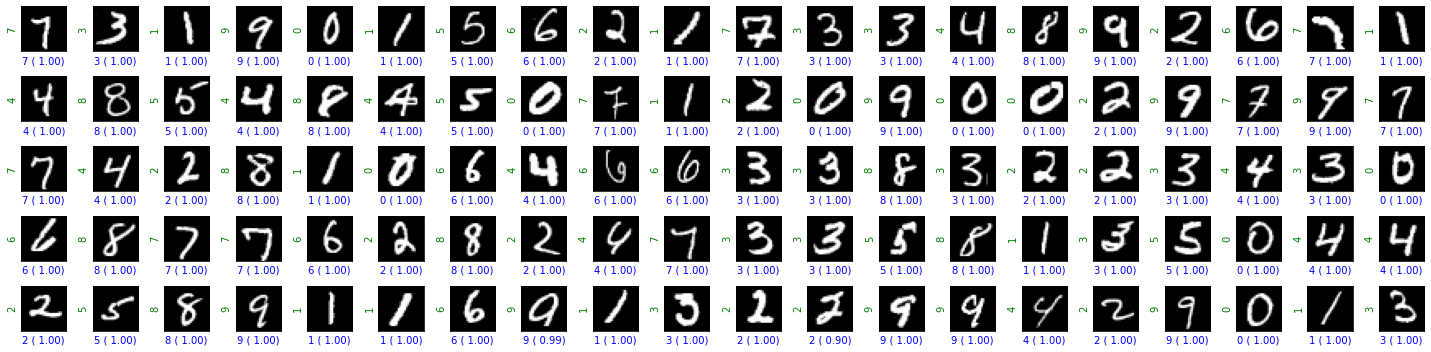

In [44]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions3 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions3[i]) 
        confidence = predictions3[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

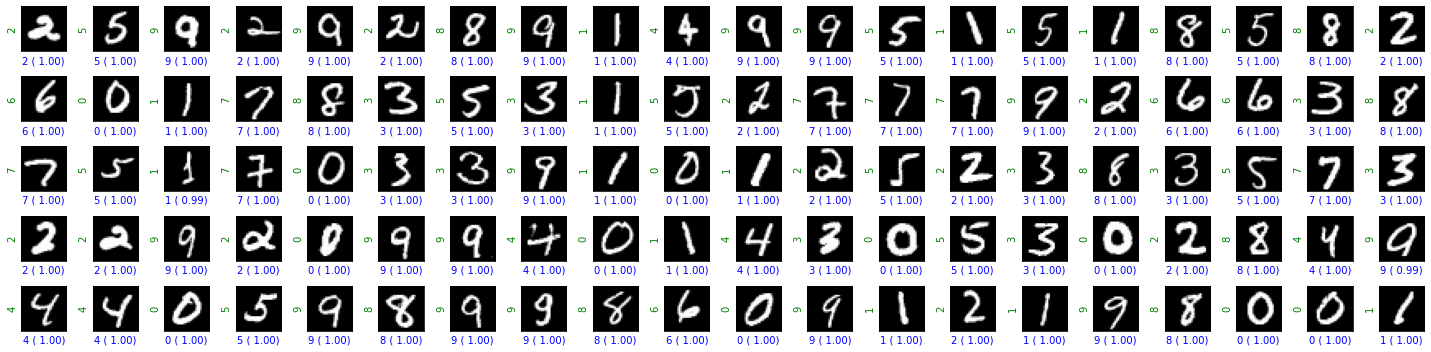

In [45]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions4 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions4[i]) 
        confidence = predictions4[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

##**RMSProp Optimizer**

In [47]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [48]:
# normalize data
h5 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 56s 148ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0535 - val_accuracy: 0.9902
Epoch 2/5
375/375 [==============================] - 55s 147ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0621 - val_accuracy: 0.9892
Epoch 3/5
375/375 [==============================] - 55s 148ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0621 - val_accuracy: 0.9882
Epoch 4/5
375/375 [==============================] - 56s 149ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0659 - val_accuracy: 0.9901
Epoch 5/5
375/375 [==============================] - 56s 148ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0628 - val_accuracy: 0.9898


In [49]:
# without normalize data
h6 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 56s 150ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0728 - val_accuracy: 0.9906
Epoch 2/5
375/375 [==============================] - 56s 149ms/step - loss: 8.5330e-04 - accuracy: 0.9997 - val_loss: 0.0837 - val_accuracy: 0.9893
Epoch 3/5
375/375 [==============================] - 56s 148ms/step - loss: 6.2263e-04 - accuracy: 0.9998 - val_loss: 0.0729 - val_accuracy: 0.9903
Epoch 4/5
375/375 [==============================] - 55s 147ms/step - loss: 7.6961e-04 - accuracy: 0.9998 - val_loss: 0.0875 - val_accuracy: 0.9898
Epoch 5/5
375/375 [==============================] - 55s 148ms/step - loss: 4.3674e-04 - accuracy: 0.9999 - val_loss: 0.1103 - val_accuracy: 0.9886


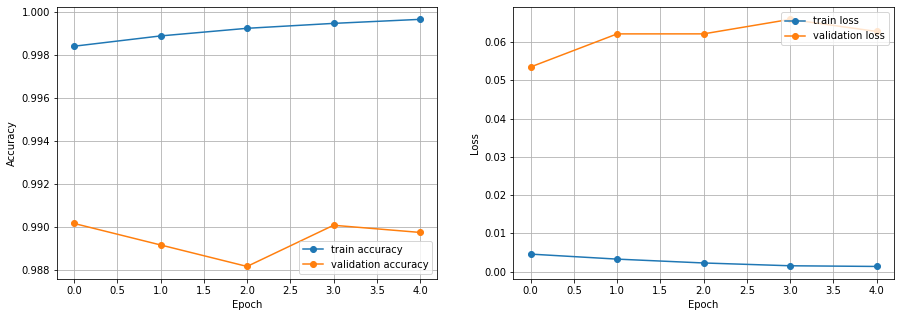

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

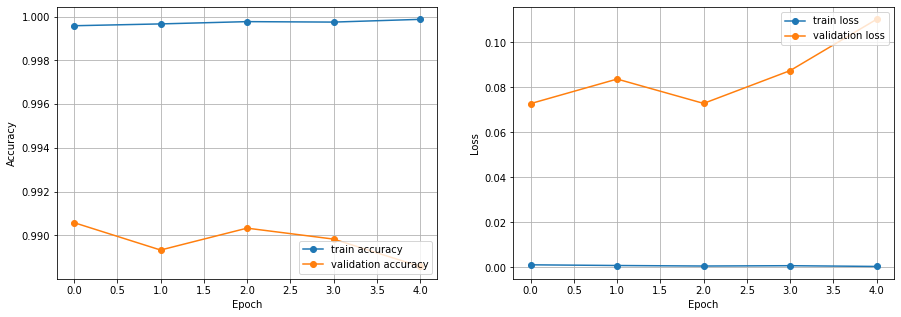

In [51]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [52]:
test_loss5, test_acc5 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# without normalization
test_loss6, test_acc6 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 3s 10ms/step - loss: 0.0975 - accuracy: 0.9882

Test accuracy: 0.9900000095367432
313/313 [==============================] - 3s 10ms/step - loss: 0.0975 - accuracy: 0.9882

Test accuracy: 0.9900000095367432


In [53]:
predictions5 = model.predict(x_test)

# without normalization
predictions6 = model.predict(x2_test)

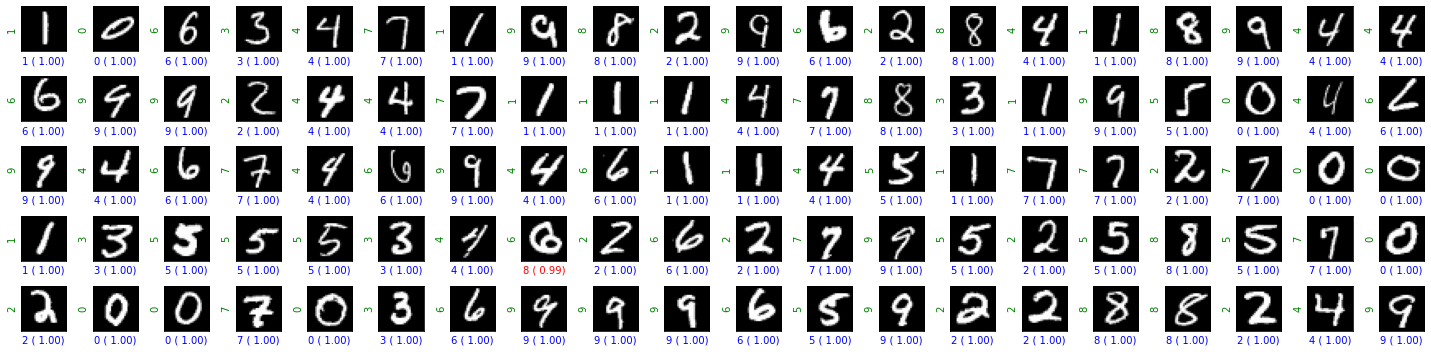

In [54]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions5 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions5[i]) 
        confidence = predictions5[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

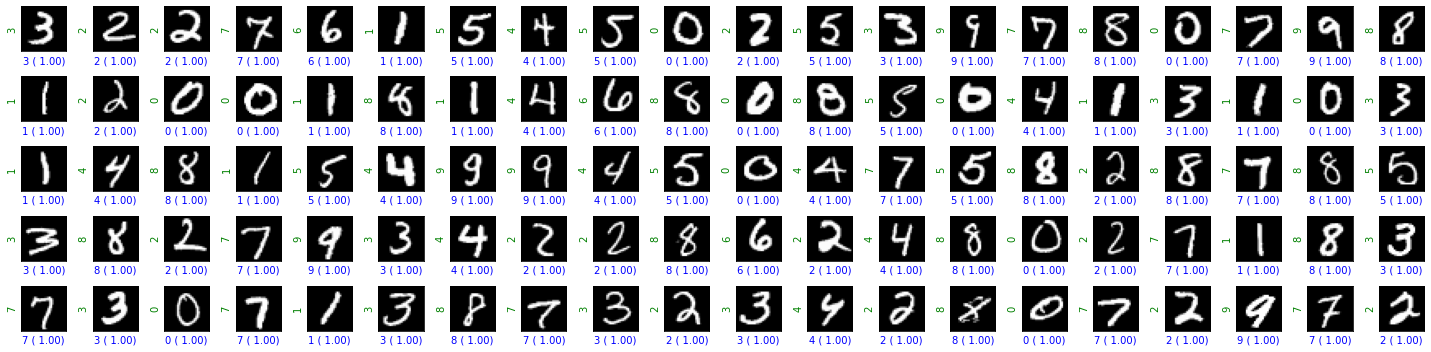

In [55]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions6 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions6[i]) 
        confidence = predictions6[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()